In [1]:
#1. Import necessary Libraries

import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from numpy.polynomial.polynomial import polyfit
import statsmodels.stats.tests.test_influence
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings

Question : Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

#### Import data

In [2]:
cars_data= pd.read_csv('ToyotaCorolla (1).csv',encoding='latin1') # the encoding as latin1 to read this file as there are some special character in this file,

In [3]:
cars_data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [4]:
#Consider only the below columns and prepare a prediction model for predicting Price.

#Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

cars_data1 = cars_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
cars_data1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


#### Initital Analysis

In [5]:
cars_data1.dtypes

Price            int64
Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [6]:
cars_data1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
cars_data1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


### Assumptions Check
***1 . Linearity Check - pairplot**

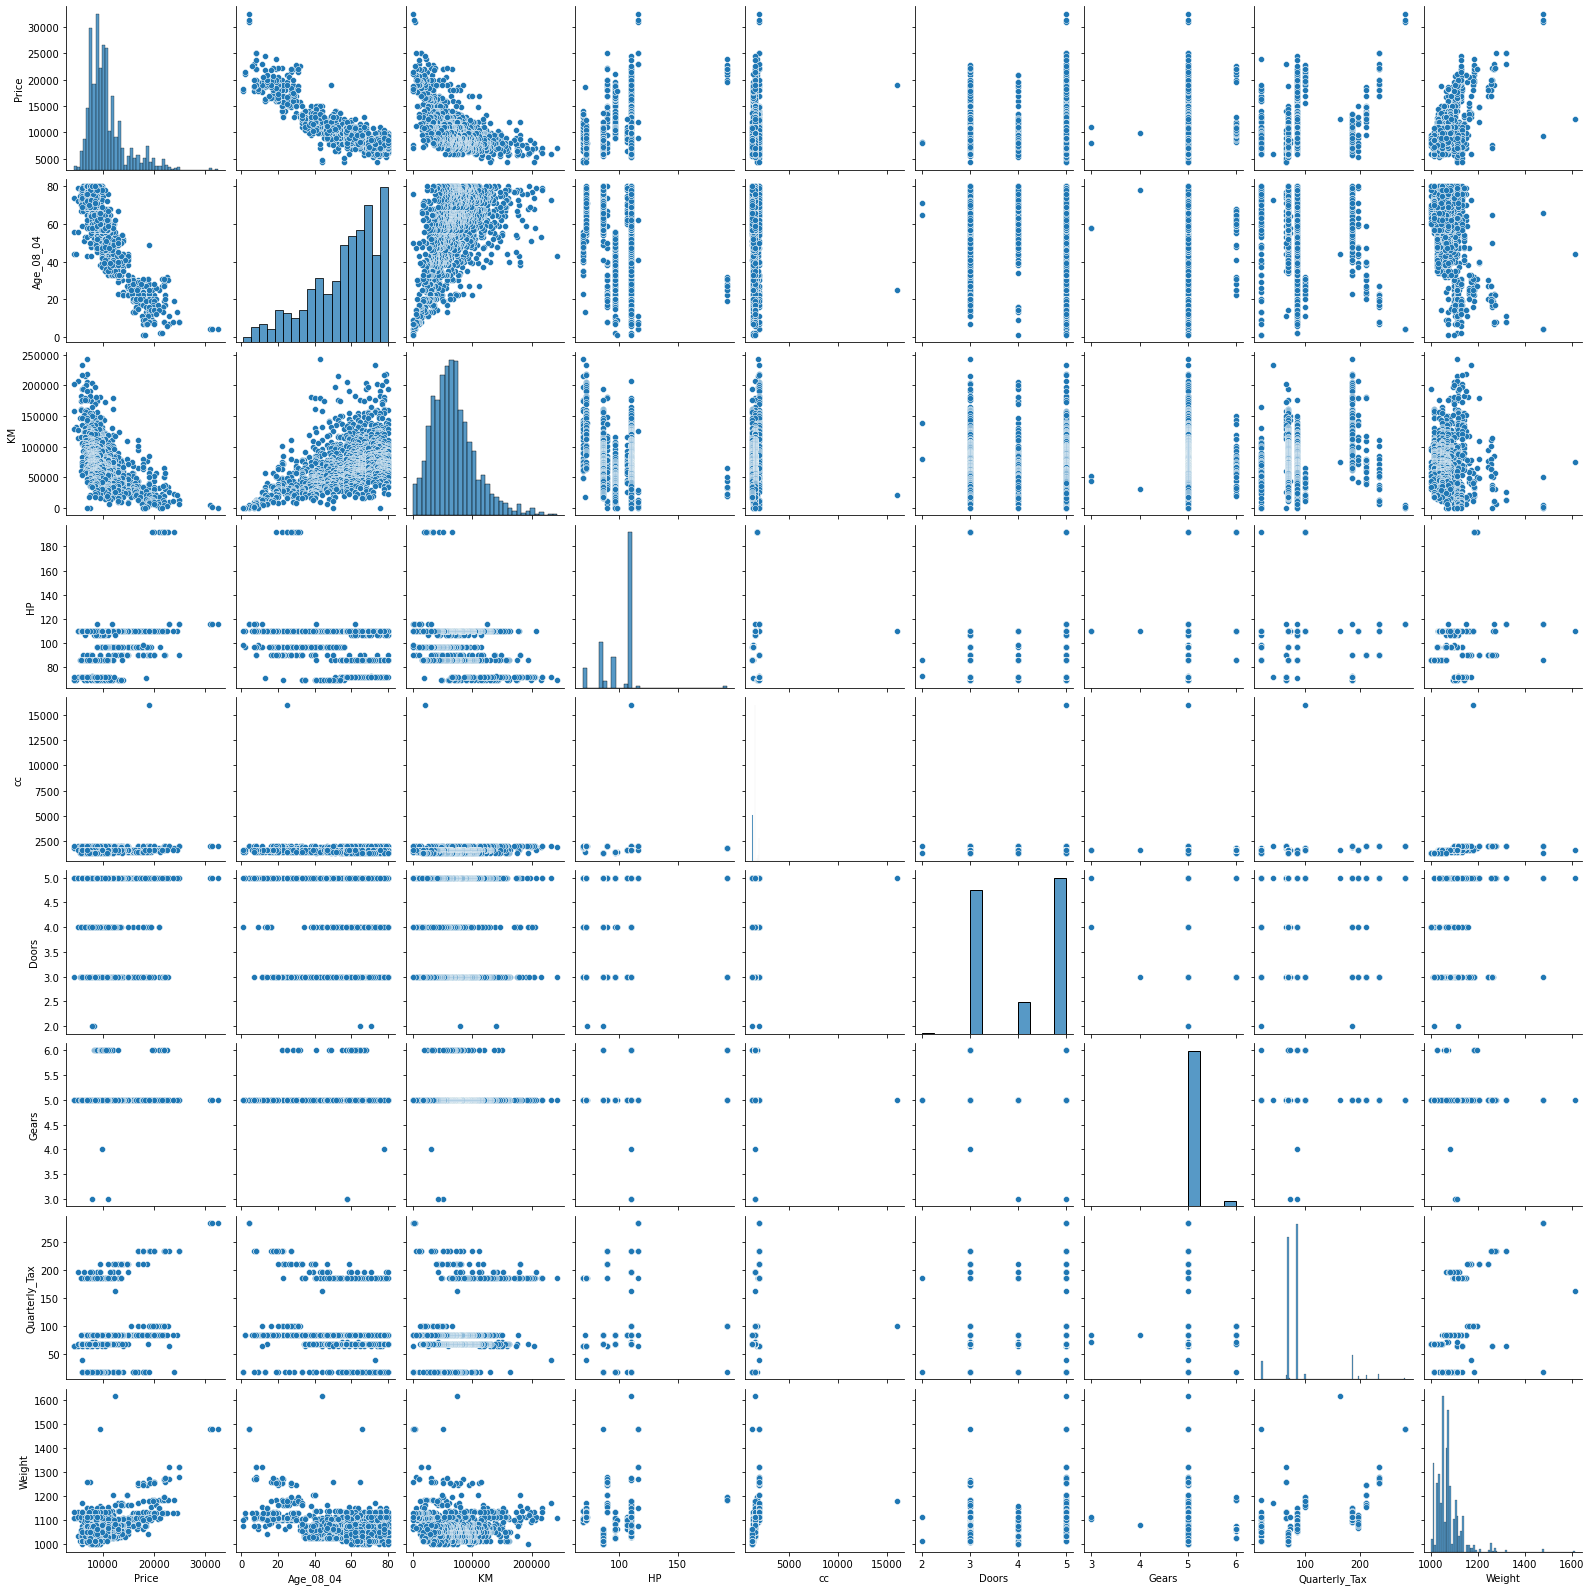

In [10]:
sns.pairplot(cars_data1)
plt.show()

Observation - Linearity check is failed

**2. No multi collinearity**
* By using,

* Correlation Matrix , Variance Inflation Factor(VIF) we can check it

In [15]:
corr_matrix = cars_data1.corr().round(2)
corr_matrix

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.00,-0.88,-0.57,0.31,0.13,0.19,0.06,0.22,0.58
Age_08_04,-0.88,1.00,0.51,-0.16,-0.10,-0.15,-0.01,-0.20,-0.47
KM,-0.57,0.51,1.00,-0.33,0.10,-0.04,0.02,0.28,-0.03
HP,0.31,-0.16,-0.33,1.00,0.04,0.09,0.21,-0.30,0.09
cc,0.13,-0.10,0.10,0.04,1.00,0.08,0.01,0.31,0.34
Doors,0.19,-0.15,-0.04,0.09,0.08,1.00,-0.16,0.11,0.30
Gears,0.06,-0.01,0.02,0.21,0.01,-0.16,1.00,-0.01,0.02
Quarterly_Tax,0.22,-0.20,0.28,-0.30,0.31,0.11,-0.01,1.00,0.63
Weight,0.58,-0.47,-0.03,0.09,0.34,0.30,0.02,0.63,1.00


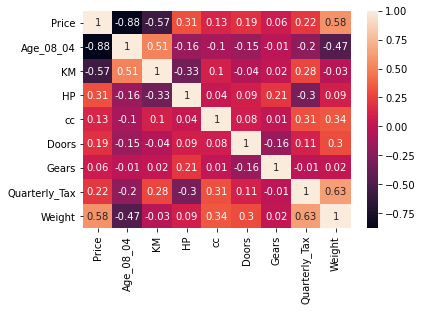

In [17]:
sns.heatmap(corr_matrix,annot=True)
plt.show()

Model Building | Training | Evaluating using Statsmodels

In [18]:
import statsmodels.formula.api as smf
model_1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = cars_data1).fit()

In [19]:
model_1.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [20]:
model_1.pvalues

Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64

In [21]:
model_1.rsquared,model_1.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

In [22]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:11:45   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Solving Multicollinearity

In [23]:
#Finding Cook's Distance
influ=model_1.get_influence()

In [25]:
summary_data=influ.summary_frame()
summary_data

,dfb_Intercept,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.041157,0.044717,0.059027,-0.001174,-0.014976,0.096060,0.022355,-0.155490,0.023320,7.236827e-03,-2.480548,0.010474,-0.255209,-2.485042,-0.255671
1,-0.034471,0.059102,-0.001105,-0.010079,-0.008099,0.074401,0.020447,-0.106650,0.019444,3.967934e-03,-1.888274,0.009916,-0.188975,-1.889975,-0.189145
2,-0.033137,0.028508,0.063641,0.001269,-0.013590,0.082311,0.018367,-0.136731,0.018183,5.464768e-03,-2.134921,0.010676,-0.221772,-2.137590,-0.222049
3,-0.015996,0.013970,0.028753,-0.000475,-0.006510,0.042743,0.009913,-0.069380,0.008110,1.406225e-03,-1.105514,0.010249,-0.112499,-1.105600,-0.112508
4,-0.015202,-0.002741,0.072923,0.005047,-0.010744,0.072989,0.015195,-0.117176,0.000423,4.123765e-03,-1.851633,0.010709,-0.192650,-1.853211,-0.192814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,-0.005339,-0.035418,0.055021,0.033235,0.004908,0.019353,-0.002635,-0.005357,-0.002633,6.035143e-04,-0.966511,0.005781,-0.073700,-0.966489,-0.073698
1432,0.016831,0.077321,-0.117081,-0.062648,-0.007211,-0.034313,0.005733,0.021079,-0.005964,2.607694e-03,1.908328,0.006403,0.153197,1.910098,0.153339
1433,0.000321,0.001350,-0.002120,-0.001130,-0.000124,-0.000612,0.000106,0.000388,-0.000128,8.447624e-07,0.034154,0.006476,0.002757,0.034142,0.002756
1434,-0.010035,-0.037348,0.060645,0.032781,0.003562,0.017782,-0.003057,-0.011155,0.004402,6.978784e-04,-0.992398,0.006337,-0.079252,-0.992393,-0.079252


In [26]:
summary_data.sort_values('cooks_d', ascending=False)

,dfb_Intercept,dfb_Age_08_04,dfb_KM,dfb_HP,dfb_cc,dfb_Doors,dfb_Gears,dfb_Quarterly_Tax,dfb_Weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
80,0.515677,-4.705252e-01,-2.424235e+00,-2.781702,2.728110e+01,0.654770,3.652747e-01,-3.977656e+00,-3.071130e+00,7.952011e+01,7.982911,0.918237,26.752214,8.164500,27.360754
221,2.139174,-1.088602e+00,1.146065e-01,0.564540,6.410386e-01,0.630731,8.519313e-02,1.441506e+00,-3.039079e+00,1.021031e+00,-7.522228,0.139712,-3.031383,-7.673262,-3.092248
960,1.541031,-8.324005e-01,1.577609e-01,0.849805,3.489060e-01,0.685880,2.037714e-03,1.568607e+00,-2.319585e+00,6.049996e-01,-5.402011,0.157248,-2.333452,-5.456195,-2.356857
601,0.692477,-4.722465e-01,3.974417e-01,0.529493,-8.673360e-02,0.419718,-5.483217e-03,6.915010e-01,-1.072724e+00,1.554993e-01,-6.100811,0.036238,-1.183002,-6.179799,-1.198318
109,-0.537798,2.873046e-01,-3.074883e-01,0.017782,-2.025374e-01,-0.183986,-6.269445e-02,9.074505e-02,7.446858e-01,1.249042e-01,4.548708,0.051531,1.060254,4.580442,1.067650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,0.000022,5.223031e-05,1.016964e-05,0.000083,1.598062e-05,-0.000129,-5.684949e-05,-1.049507e-05,1.498485e-05,4.787348e-09,0.004339,0.002284,0.000208,0.004337,0.000207
1251,0.000007,3.625946e-05,6.488045e-06,0.000045,7.652586e-06,-0.000068,-3.033481e-05,-6.670375e-06,1.231308e-05,1.432782e-09,0.002284,0.002466,0.000114,0.002283,0.000114
482,-0.000002,-4.059198e-07,-1.122747e-07,-0.000018,-2.527201e-08,-0.000034,3.091887e-06,-5.696935e-06,8.137963e-06,3.189477e-10,-0.001328,0.001625,-0.000054,-0.001328,-0.000054
1095,0.000001,5.698164e-07,1.699506e-05,0.000011,2.527972e-08,-0.000013,-6.671838e-06,-5.426641e-06,2.919427e-06,8.462071e-11,0.000405,0.004615,0.000028,0.000405,0.000028


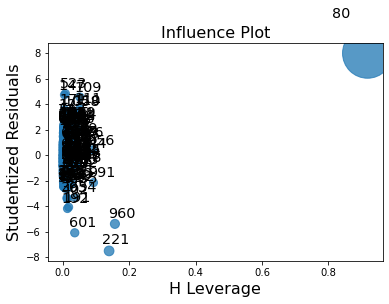

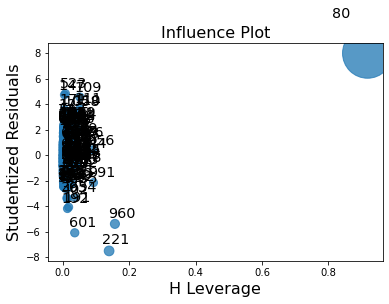

In [32]:
influ.plot_influence(size=50)

In [39]:
x= cars_data1.drop(labels='Price',axis =1)
y=cars_data1[['Price']]
y

,Price
0,13500
1,13750
2,13950
3,14950
4,13750
...,...
1431,7500
1432,10845
1433,8500
1434,7250


In [40]:
x

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


* From above we can see Index 80 has highest Cook's Distance

In [41]:
#Finding Variance Inflation Factor (VIF)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif.round(2)

,VIF Factor,features
0,16.39,Age_08_04
1,7.59,KM
2,64.89,HP
3,17.20,cc
4,21.87,Doors
5,438.63,Gears
6,11.02,Quarterly_Tax
7,543.13,Weight


**Weight along with Gears have a high variance inflation factor.** 
* **To improve model we will now discard one of these variables and try to solve multicolinearity.**

In [43]:
# Removed Weight fron the dataframe and Tested the model
x_new = x.drop(labels='Weight',axis =1 )
x_new

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax
0,23,46986,90,2000,3,5,210
1,23,72937,90,2000,3,5,210
2,24,41711,90,2000,3,5,210
3,26,48000,90,2000,3,5,210
4,30,38500,90,2000,3,5,210
...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69
1432,72,19000,86,1300,3,5,69
1433,71,17016,86,1300,3,5,69
1434,70,16916,86,1300,3,5,69


In [44]:
model_2= sm.OLS(y, x_new).fit()
y_predict_2 = model_2.predict(x_new)

In [45]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.155e+04
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                        0.00
Time:                        17:15:42   Log-Likelihood:                         -12532.
No. Observations:                1436   AIC:                                  2.508e+04
Df Residuals:                    1429   BIC:                                  2.512e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0628      2.682    -49.245      0.000    -137.323    -126.802
KM               -0.0208      0.001    -14.947      0.000      -0.024      -0.018
HP               44.4711      3.027     14.692      0.000      38.533      50.409
cc                0.1805      0.099      1.827      0.068      -0.013       0.374
Doors           272.5298     41.159      6.621      0.000     191.791     353.269
Gears          2417.9083     81.331     29.729      0.000    2258.368    2577.449
Quarterly_Tax    17.0169      1.177     14.462      0.000      14.709      19.325
==============================================================================
Omnibus:                      184.883   Durbin-Watson:                   1.396
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              583.580
Skew:                           0.640   Prob(JB):                    1.89e-127
Kurtosis:                       5.849   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
# Removed Index with highest Cook's distance to remove the hightest influencial ROW
cars_data_new=cars_data1.drop(cars_data1.index[[80]])

In [47]:
x_new=cars_data_new[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]
y_new=cars_data_new[['Price']]

In [95]:
model_3 =sm.OLS(y_new,x_new).fit()
y_predict_3=model_3.predict(x_new)

In [96]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                          1.152e+04
Date:                Fri, 10 Dec 2021   Prob (F-statistic):                        0.00
Time:                        17:57:58   Log-Likelihood:                         -12524.
No. Observations:                1435   AIC:                                  2.506e+04
Df Residuals:                    1428   BIC:                                  2.510e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Age_08_04      -132.0191      2.684    -49.196      0.000    -137.283    -126.755
KM               -0.0210      0.001    -14.581      0.000      -0.024      -0.018
HP               43.7530      3.287     13.310      0.000      37.304      50.202
cc                0.3468      0.313      1.109      0.268      -0.267       0.960
Doors           270.3889     41.346      6.540      0.000     189.284     351.494
Gears          2394.0486     91.807     26.077      0.000    2213.957    2574.140
Quarterly_Tax    16.4778      1.520     10.843      0.000      13.497      19.459
==============================================================================
Omnibus:                      183.937   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.178
Skew:                           0.636   Prob(JB):                    3.82e-127
Kurtosis:                       5.849   Cond. No.                     1.82e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.82e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
#Model Training using Linear Regression
linear_model_3 = LinearRegression() #Initialization
linear_model_3.fit(x_new,y_new) #Model Training

LinearRegression()

In [55]:
#Model Testing
y_pred = linear_model_3.predict(x_new)
y_pred

array([[16957.34196601],
       [16454.13198816],
       [16922.8940111 ],
       ...,
       [ 8567.49756182],
       [ 8706.17092735],
       [ 8614.14795736]])

In [57]:
error = y_new - y_pred
error

,Price
0,-3457.341966
1,-2704.131988
2,-2972.894011
3,-1577.476857
4,-2414.752058
...,...
1431,-1272.555487
1432,2452.708022
1433,-67.497562
1434,-1456.170927


In [58]:
from sklearn.metrics import mean_squared_error

In [60]:
mean_squared_error(y_new,y_pred)

2104440.7907871483

In [62]:
#Model validation Techniques
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_new,y_new,test_size=0.20,random_state=12)

In [63]:
#Training data
X_train.shape,y_train.shape

((1148, 7), (1148, 1))

In [64]:
#Test data
X_test.shape,y_test.shape

((287, 7), (287, 1))

In [86]:
#Model Training
from sklearn.linear_model import LinearRegression
linear_model_4 = LinearRegression() #Initialization
linear_model_4.fit(X_train,y_train) #Model Training

LinearRegression()

In [87]:
#Model Testing
#Training data

y_train_pred = linear_model_4.predict(X_train)
y_train_pred

array([[8429.50690391],
       [7766.48038665],
       [9367.05669369],
       ...,
       [8245.33867508],
       [8865.47377136],
       [8671.66501061]])

In [88]:
mean_squared_error(y_train,y_train_pred)

2120176.338903456

In [69]:
#For Test data

y_pred_test = linear_model_4.predict(X_test) #unseen by the model during the training time
y_pred_test

array([[13974.14122659],
       [ 7536.36292744],
       [10450.78527314],
       [17590.21421485],
       [15143.40754046],
       [10564.82698274],
       [ 9936.36739349],
       [ 9330.1235286 ],
       [10029.95541038],
       [10044.40813828],
       [ 8512.21664452],
       [ 8166.17931011],
       [ 8753.5507772 ],
       [11610.35795622],
       [ 8043.93625962],
       [ 7695.05698922],
       [ 7618.82725676],
       [ 7281.88908097],
       [ 8212.54503908],
       [ 7689.13161346],
       [ 9144.4075991 ],
       [ 7822.8695765 ],
       [ 7550.45255154],
       [11638.23826508],
       [ 8583.01216518],
       [13589.5782886 ],
       [ 9684.80644095],
       [ 6761.37494831],
       [16440.59346899],
       [ 7078.90709565],
       [ 8578.24754243],
       [ 6765.74838119],
       [16643.07148938],
       [10415.10798165],
       [17050.19769714],
       [ 8486.90625116],
       [ 9302.64180694],
       [ 7313.78152862],
       [ 8329.37300833],
       [12718.87749158],


In [70]:
mean_squared_error(y_test,y_pred_test)

2272564.4920683876

Check MSE for Log Transformation inputs

In [72]:
cars_data_new['log_Age_08_04'] = np.log(cars_data_new['Age_08_04'])
cars_data_new['log_KM'] = np.log(cars_data_new['KM'])
cars_data_new['log_HP'] = np.log(cars_data_new['HP'])
cars_data_new['log_cc'] = np.log(cars_data_new['cc'])
cars_data_new['log_Doors'] = np.log(cars_data_new['Doors'])
cars_data_new['log_Gears'] = np.log(cars_data_new['Gears'])
cars_data_new['log_Quarterly_Tax'] = np.log(cars_data_new['Quarterly_Tax'])
cars_data_new['log_Weight'] = np.log(cars_data_new['Weight'])
cars_data_new

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,log_Age_08_04,log_KM,log_HP,log_cc,log_Doors,log_Gears,log_Quarterly_Tax,log_Weight
0,13500,23,46986,90,2000,3,5,210,1165,3.135494,10.757605,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
1,13750,23,72937,90,2000,3,5,210,1165,3.135494,11.197351,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
2,13950,24,41711,90,2000,3,5,210,1165,3.178054,10.638520,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
3,14950,26,48000,90,2000,3,5,210,1165,3.258097,10.778956,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476
4,13750,30,38500,90,2000,3,5,210,1170,3.401197,10.558414,4.499810,7.600902,1.098612,1.609438,5.347108,7.064759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,4.234107,9.930324,4.454347,7.170120,1.098612,1.609438,4.234107,6.932448
1432,10845,72,19000,86,1300,3,5,69,1015,4.276666,9.852194,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
1433,8500,71,17016,86,1300,3,5,69,1015,4.262680,9.741909,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644
1434,7250,70,16916,86,1300,3,5,69,1015,4.248495,9.736015,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644


In [73]:
cars_data_log_transformed = cars_data_new.loc[:,['log_Age_08_04','log_KM','log_HP','log_cc','log_Doors','log_Gears','log_Quarterly_Tax','log_Weight','Price']]
cars_data_log_transformed

,log_Age_08_04,log_KM,log_HP,log_cc,log_Doors,log_Gears,log_Quarterly_Tax,log_Weight,Price
0,3.135494,10.757605,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476,13500
1,3.135494,11.197351,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476,13750
2,3.178054,10.638520,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476,13950
3,3.258097,10.778956,4.499810,7.600902,1.098612,1.609438,5.347108,7.060476,14950
4,3.401197,10.558414,4.499810,7.600902,1.098612,1.609438,5.347108,7.064759,13750
...,...,...,...,...,...,...,...,...,...
1431,4.234107,9.930324,4.454347,7.170120,1.098612,1.609438,4.234107,6.932448,7500
1432,4.276666,9.852194,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644,10845
1433,4.262680,9.741909,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644,8500
1434,4.248495,9.736015,4.454347,7.170120,1.098612,1.609438,4.234107,6.922644,7250


In [74]:
X = cars_data_log_transformed.drop('Price',axis = 1)
y = cars_data_log_transformed[['Price']]

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [89]:
#Model Training
linear_model_4 = LinearRegression() #Initialization
linear_model_4.fit(X_train,y_train) #Model Training

LinearRegression()

In [91]:
#Model Testing
#Training data

y_train_pred = linear_model_4.predict(X_train)
y_train_pred

array([[8429.50690391],
       [7766.48038665],
       [9367.05669369],
       ...,
       [8245.33867508],
       [8865.47377136],
       [8671.66501061]])

In [92]:
mean_squared_error(y_train,y_train_pred)

2120176.338903456

In [93]:
#For Test data
y_pred_test = linear_model_2.predict(X_test) #unseen by the model during the training time
y_pred_test

array([[11243.65528558],
       [ 9081.56596518],
       [ 9482.87600853],
       [17653.60431383],
       [15017.31320011],
       [ 9264.72055476],
       [ 9747.87220365],
       [ 8942.69168094],
       [ 9003.52138616],
       [ 9730.18191223],
       [ 8211.00268352],
       [ 8865.16255411],
       [ 8861.64690594],
       [10947.5238454 ],
       [ 9012.23452935],
       [ 8138.47022087],
       [ 9271.32009841],
       [ 7951.88053537],
       [ 9074.43657479],
       [ 8080.34805044],
       [ 9136.16474295],
       [ 8391.59575926],
       [ 9050.98649803],
       [10276.94807517],
       [ 8988.00444928],
       [12165.94593646],
       [ 9626.38054206],
       [ 8593.16512102],
       [17134.48289788],
       [ 8834.25803512],
       [ 7814.60894506],
       [ 7820.27934607],
       [16551.344572  ],
       [ 8962.11429614],
       [16710.22093771],
       [ 8094.21203354],
       [ 9745.41813702],
       [ 8094.26630173],
       [ 9502.82427736],
       [13258.06999588],


In [94]:
mean_squared_error(y_test,y_pred_test)

1954268.6295674213

#### Homoscedasticity CHECK

In [101]:
x_new=cars_data_new[['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax']]
y_new=cars_data_new[['Price']]

In [102]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_x_new = std_scaler.fit_transform(x_new)
print(scaled_x_new)

[[-1.77422207 -0.57573215 -0.76746519 ... -1.08444302 -0.14047507
   2.98795918]
 [-1.77422207  0.11657952 -0.76746519 ... -1.08444302 -0.14047507
   2.98795918]
 [-1.72040663 -0.71645675 -0.76746519 ... -1.08444302 -0.14047507
   2.98795918]
 ...
 [ 0.80891926 -1.3752613  -1.03449861 ... -1.08444302 -0.14047507
  -0.44042839]
 [ 0.75510381 -1.37792906 -1.03449861 ... -1.08444302 -0.14047507
  -0.44042839]
 [ 1.07799648 -1.8291815   0.56770187 ...  1.01565918 -0.14047507
  -1.65616866]]


In [103]:
scaled_x_new = pd.DataFrame(data = scaled_x_new,columns=['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax'])
scaled_x_new

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax
0,-1.774222,-0.575732,-0.767465,2.314319,-1.084443,-0.140475,2.987959
1,-1.774222,0.116580,-0.767465,2.314319,-1.084443,-0.140475,2.987959
2,-1.720407,-0.716457,-0.767465,2.314319,-1.084443,-0.140475,2.987959
3,-1.612776,-0.548681,-0.767465,2.314319,-1.084443,-0.140475,2.987959
4,-1.397514,-0.802119,-0.767465,2.314319,-1.084443,-0.140475,2.987959
...,...,...,...,...,...,...,...
1430,0.701288,-1.281143,-1.034499,-1.425389,-1.084443,-0.140475,-0.440428
1431,0.862735,-1.322333,-1.034499,-1.425389,-1.084443,-0.140475,-0.440428
1432,0.808919,-1.375261,-1.034499,-1.425389,-1.084443,-0.140475,-0.440428
1433,0.755104,-1.377929,-1.034499,-1.425389,-1.084443,-0.140475,-0.440428


In [104]:
scaled_x_new.mean(),scaled_x_new.std()

(Age_08_04       -1.234166e-15
 KM              -9.237675e-17
 HP              -8.899579e-16
 cc              -1.081268e-15
 Doors           -1.241902e-15
 Gears           -2.065363e-15
 Quarterly_Tax   -2.052559e-15
 dtype: float64,
 Age_08_04        1.000349
 KM               1.000349
 HP               1.000349
 cc               1.000349
 Doors            1.000349
 Gears            1.000349
 Quarterly_Tax    1.000349
 dtype: float64)

In [105]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(scaled_x_new,y)

LinearRegression()

In [106]:
y_predicted = linear_model.predict(scaled_x_new)
y_predicted

array([[16957.34196601],
       [16454.13198816],
       [16922.8940111 ],
       ...,
       [ 8567.49756182],
       [ 8706.17092735],
       [ 8614.14795736]])

In [107]:
error = y - y_predicted
error

,Price
0,-3457.341966
1,-2704.131988
2,-2972.894011
3,-1577.476857
4,-2414.752058
...,...
1431,-1272.555487
1432,2452.708022
1433,-67.497562
1434,-1456.170927


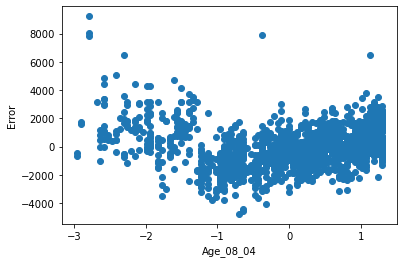

In [108]:
plt.scatter(x =scaled_x_new['Age_08_04'],y = error)
plt.xlabel('Age_08_04')
plt.ylabel('Error')
plt.show()

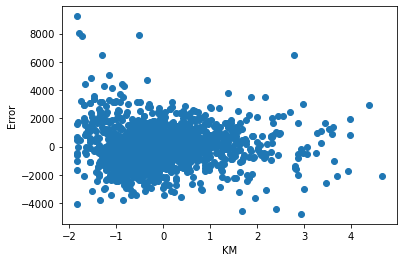

In [109]:
plt.scatter(x =scaled_x_new['KM'],y = error)
plt.xlabel('KM')
plt.ylabel('Error')
plt.show()

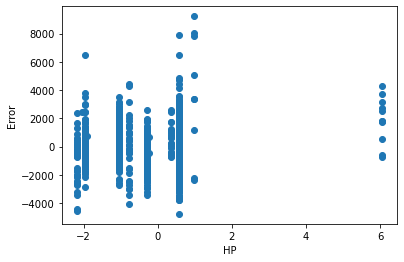

In [110]:
plt.scatter(x =scaled_x_new['HP'],y = error)
plt.xlabel('HP')
plt.ylabel('Error')
plt.show()

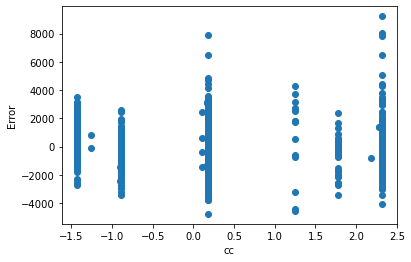

In [111]:
plt.scatter(x =scaled_x_new['cc'],y = error)
plt.xlabel('cc')
plt.ylabel('Error')
plt.show()

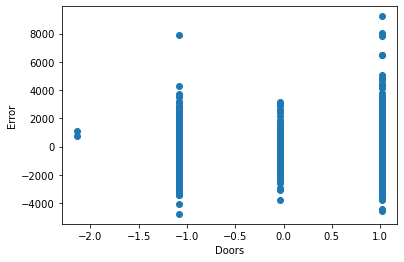

In [112]:
plt.scatter(x =scaled_x_new['Doors'],y = error)
plt.xlabel('Doors')
plt.ylabel('Error')
plt.show()

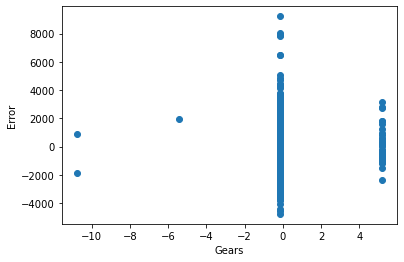

In [113]:
plt.scatter(x =scaled_x_new['Gears'],y = error)
plt.xlabel('Gears')
plt.ylabel('Error')
plt.show()

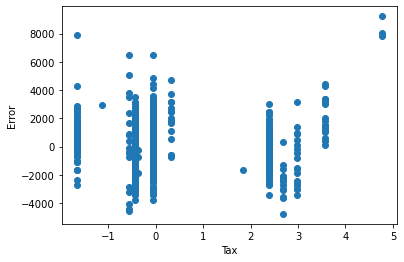

In [115]:
plt.scatter(x =scaled_x_new['Quarterly_Tax'],y = error)
plt.xlabel('Tax')
plt.ylabel('Error')
plt.show()

### Test for Normality Quantile -Quantile plot

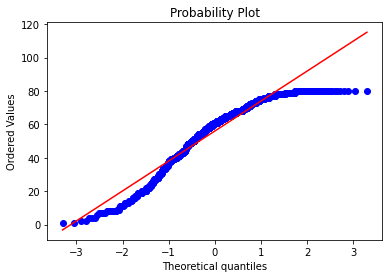

In [117]:
from scipy import stats
stats.probplot(x = x_new['Age_08_04'],dist='norm',plot = plt)
plt.show()

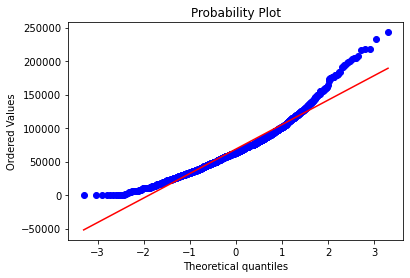

In [118]:
from scipy import stats
stats.probplot(x = x_new['KM'],dist='norm',plot = plt)
plt.show()

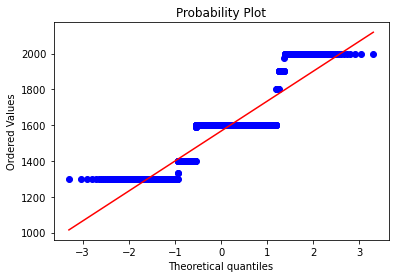

In [119]:
from scipy import stats
stats.probplot(x = x_new['cc'],dist='norm',plot = plt)
plt.show()

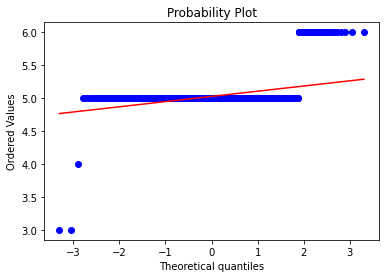

In [120]:
from scipy import stats
stats.probplot(x = x_new['Gears'],dist='norm',plot = plt)
plt.show()

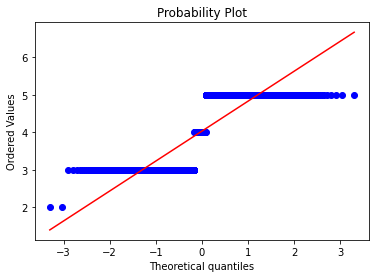

In [121]:
from scipy import stats
stats.probplot(x = x_new['Doors'],dist='norm',plot = plt)
plt.show()

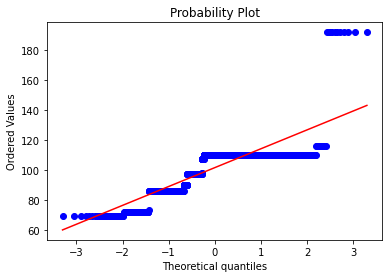

In [122]:
from scipy import stats
stats.probplot(x = x_new['HP'],dist='norm',plot = plt)
plt.show()

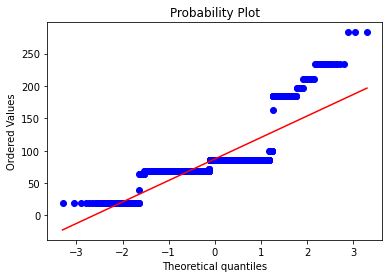

In [123]:
from scipy import stats
stats.probplot(x = x_new['Quarterly_Tax'],dist='norm',plot = plt)
plt.show()

In [100]:
Model_data={'Models':['Model_1','Model_Final'],'Rsquared':[model_1.rsquared,model_3.rsquared]}
table=pd.DataFrame(Model_data)
table

,Models,Rsquared
0,Model_1,0.863763
1,Model_Final,0.982600


#### We will use Model_Final as it has better R squared value as compared with the other